In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser 
from datetime import datetime

In [2]:
#Call example:
#stations = [1, 3, 5, 9]
#weather_pollutant("PM10", "TMEDIA °C", "2018-01-03", "2018-12-31", stations)

def weather_pollutant(pollutant, weather_attribute, date1, date2, given_stations = []):
    existing_stations = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    inq = pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')
    weather = pd.read_csv('../csv/weathermilan_ilmeteo/Milano-2018.csv', encoding='utf-8', sep=',')
    
    #Convert into datetime type
    inq['data'] = pd.to_datetime(inq['data'])
    weather['DATA'] = pd.to_datetime(weather['DATA'])
    
    #Select only Data from date1 to date2
    inq.drop(inq.index[(inq["data"] < date1)], axis=0, inplace=True)
    inq.drop(inq.index[(inq["data"] > date2)], axis=0, inplace=True)
    weather.drop(weather.index[(weather["DATA"] < date1)], axis=0, inplace=True)
    weather.drop(weather.index[(weather["DATA"] > date2)], axis=0, inplace=True)
    
    #Select only given pollutant
    inq.drop(inq.index[(inq["inquinante"]!=pollutant)], axis=0, inplace=True)
    
    #Select only given stations
    for s in existing_stations:
        if s not in given_stations:
               inq.drop(inq.index[(inq["stazione_id"]==s)], axis=0, inplace=True)

    #Delete not a number values
    inq.dropna(subset=["valore"], axis=0, inplace=True)
    
    #Group by date
    inq = inq.set_index('data').groupby(pd.Grouper(freq='D'))

    #Calculate daily pollutant mean
    inq_mean = inq['valore'].mean().reset_index()
    
    weather = weather.rename(columns={"DATA":"data"})
    
    #Inner-join between 'data' from inq_mean and weather
    result=pd.merge(inq_mean,weather,on='data')

    result.plot.scatter(x=weather_attribute, y='valore')

    plt.xlabel('Weather attribute: '+weather_attribute)
    plt.ylabel('Pollutant: '+pollutant)
    plt.show()

In [3]:
#Call example:
#stations = [1, 3, 5, 9]
#rain("PM10", "2018-01-03", "2018-12-31", stations)

def rain(pollutant, date1, date2, given_stations = []):
    existing_stations = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    inq = pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')
    milan_weather = pd.read_csv('../csv/precipitazioni.csv', encoding='utf-8', sep=',')
    
    #Convert into datetime type
    inq['data'] = pd.to_datetime(inq['data'])
    milan_weather['Data-Ora'] = pd.to_datetime(milan_weather['Data-Ora'])
    
    #Select only Data from date1 to date2
    inq.drop(inq.index[(inq["data"] < date1)], axis=0, inplace=True)
    inq.drop(inq.index[(inq["data"] > date2)], axis=0, inplace=True)
    milan_weather.drop(milan_weather.index[(milan_weather["Data-Ora"] < date1)], axis=0, inplace=True)
    milan_weather.drop(milan_weather.index[(milan_weather["Data-Ora"] > date2)], axis=0, inplace=True)
    
    #Select only given pollutant
    inq.drop(inq.index[(inq["inquinante"]!=pollutant)], axis=0, inplace=True)
    
    #Select only given stations
    for s in existing_stations:
        if s not in given_stations:
               inq.drop(inq.index[(inq["stazione_id"]==s)], axis=0, inplace=True)
    
    #Delete not a number values
    inq.dropna(subset=["valore"], axis=0, inplace=True)   
    
    #Group by date
    inq = inq.set_index('data').groupby(pd.Grouper(freq='D'))
    milan_weather = milan_weather.set_index('Data-Ora').groupby(pd.Grouper(freq='D'))

    #Calculate daily pollutant mean
    inq_mean = inq['valore'].mean().reset_index()
    
    #Calculate daily mm of rain mean
    milan_weather_mean = milan_weather['Valore Cumulato'].mean().reset_index().rename(columns={"Data-Ora":"data"})
    
    #Inner-join between 'data' from inq_mean and milan_weather
    result=pd.merge(inq_mean,milan_weather_mean,on='data')

    result.plot.scatter(x='Valore Cumulato', y='valore')

    plt.xlabel('Daily mm of rain')
    plt.ylabel('Pollutant: '+pollutant)
    plt.show()

In [4]:
#Stations by pollutant
NO2 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
CO_8h = [3, 4, 6, 7, 8]
PM10 = [2, 4, 6, 7, 9]
PM25 = [2, 6, 9]
C6H6 = [2, 4, 6, 8]
O3 = [2, 5, 7, 9]
SO2 = [2, 9]

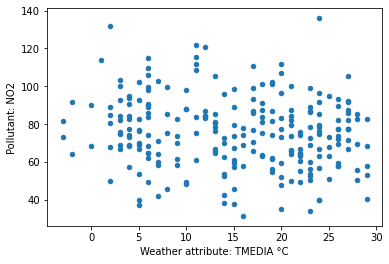

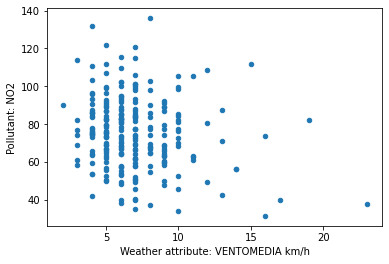

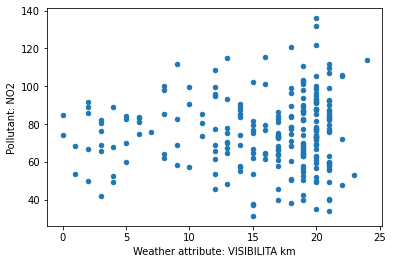

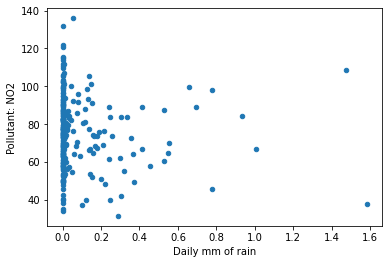

In [5]:
weather_pollutant("NO2", "TMEDIA °C", "2018-01-03", "2018-12-31", NO2)
weather_pollutant("NO2", "VENTOMEDIA km/h", "2018-01-03", "2018-12-31", NO2)
weather_pollutant("NO2", "VISIBILITA km", "2018-01-03", "2018-12-31", NO2)
rain("NO2", "2018-01-03", "2018-12-31", NO2)

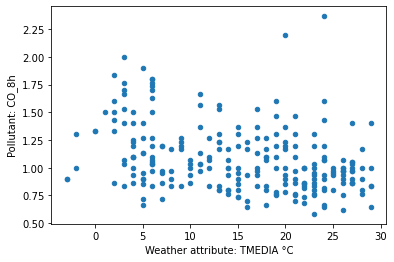

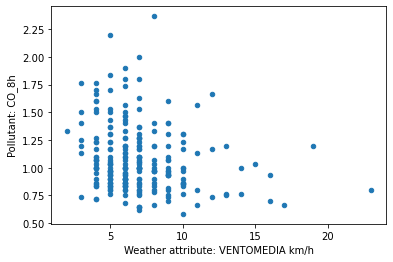

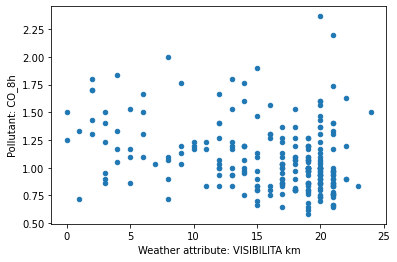

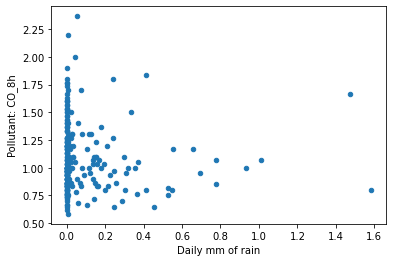

In [6]:
weather_pollutant("CO_8h", "TMEDIA °C", "2018-01-03", "2018-12-31", CO_8h)
weather_pollutant("CO_8h", "VENTOMEDIA km/h", "2018-01-03", "2018-12-31", CO_8h)
weather_pollutant("CO_8h", "VISIBILITA km", "2018-01-03", "2018-12-31", CO_8h)
rain("CO_8h", "2018-01-03", "2018-12-31", CO_8h)

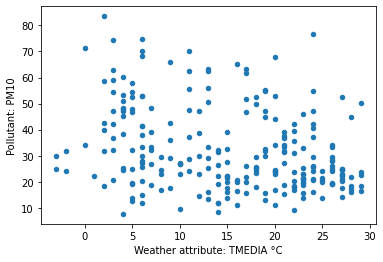

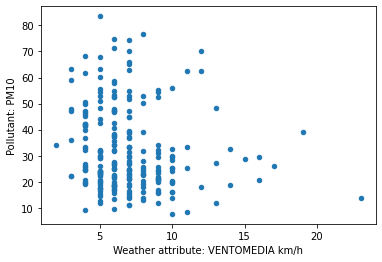

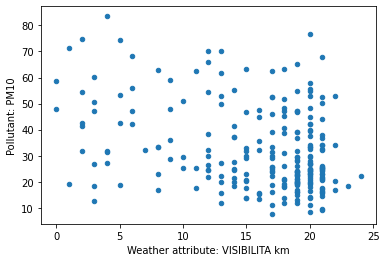

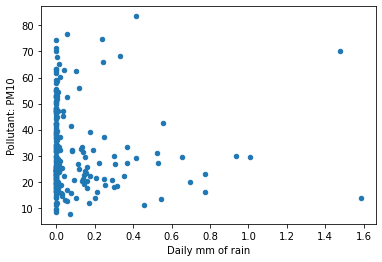

In [7]:
weather_pollutant("PM10", "TMEDIA °C", "2018-01-03", "2018-12-31", PM10)
weather_pollutant("PM10", "VENTOMEDIA km/h", "2018-01-03", "2018-12-31", PM10)
weather_pollutant("PM10", "VISIBILITA km", "2018-01-03", "2018-12-31", PM10)
rain("PM10", "2018-01-03", "2018-12-31", PM10)

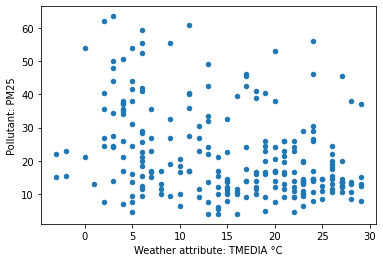

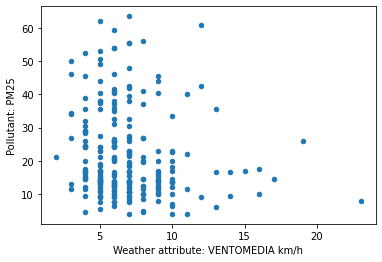

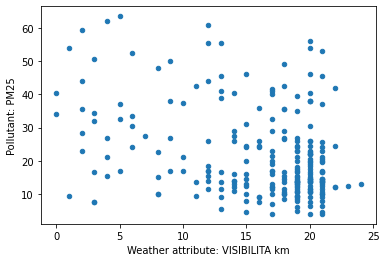

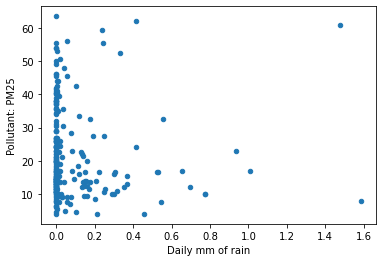

In [8]:
weather_pollutant("PM25", "TMEDIA °C", "2018-01-03", "2018-12-31", PM25)
weather_pollutant("PM25", "VENTOMEDIA km/h", "2018-01-03", "2018-12-31", PM25)
weather_pollutant("PM25", "VISIBILITA km", "2018-01-03", "2018-12-31", PM25)
rain("PM25", "2018-01-03", "2018-12-31", PM25)

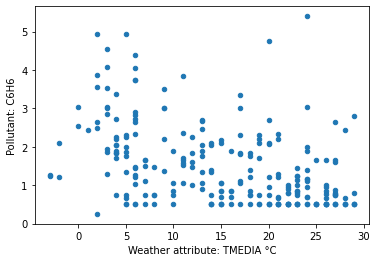

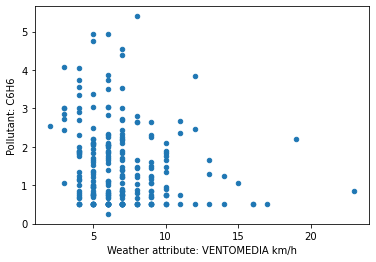

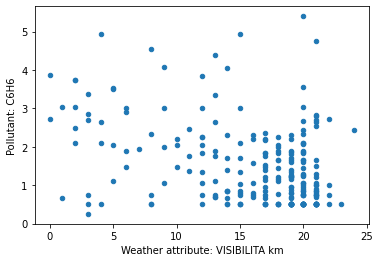

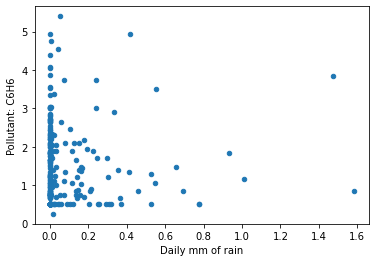

In [9]:
weather_pollutant("C6H6", "TMEDIA °C", "2018-01-03", "2018-12-31", C6H6)
weather_pollutant("C6H6", "VENTOMEDIA km/h", "2018-01-03", "2018-12-31", C6H6)
weather_pollutant("C6H6", "VISIBILITA km", "2018-01-03", "2018-12-31", C6H6)
rain("C6H6", "2018-01-03", "2018-12-31", C6H6)

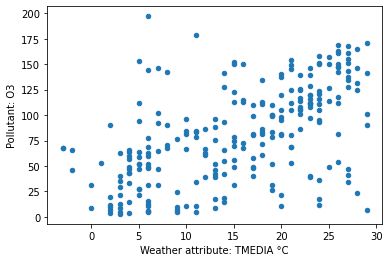

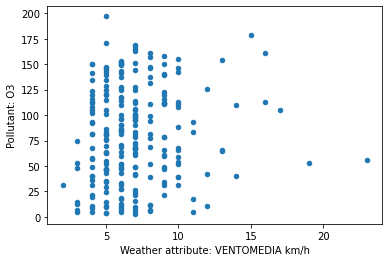

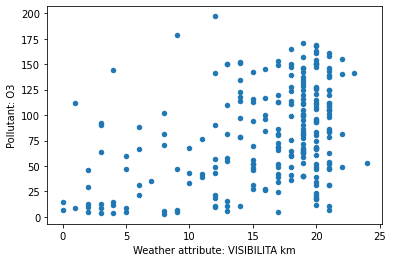

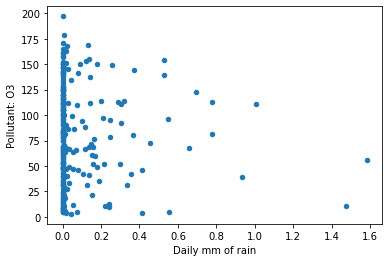

In [10]:
weather_pollutant("O3", "TMEDIA °C", "2018-01-01", "2018-12-31", O3)
weather_pollutant("O3", "VENTOMEDIA km/h", "2018-01-01", "2018-12-31", O3)
weather_pollutant("O3", "VISIBILITA km", "2018-01-03", "2018-12-31", O3)
rain("O3", "2018-01-03", "2018-12-31", O3)

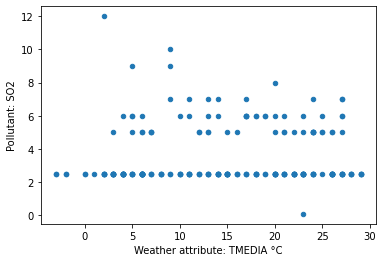

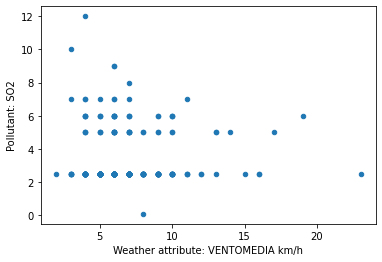

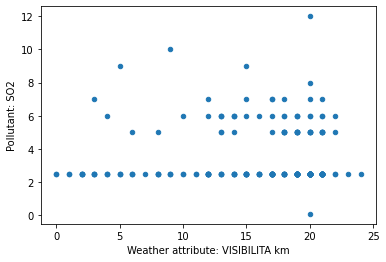

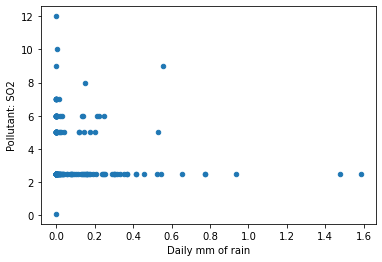

In [11]:
weather_pollutant("SO2", "TMEDIA °C", "2018-01-01", "2018-12-31", SO2)
weather_pollutant("SO2", "VENTOMEDIA km/h", "2018-01-01", "2018-12-31", SO2)
weather_pollutant("SO2", "VISIBILITA km", "2018-01-03", "2018-12-31", SO2)
rain("SO2", "2018-01-03", "2018-12-31", SO2)